In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import glob
import os
import string

start_date = np.datetime64('2024-09-25 00:00:00')
end_date = np.datetime64('2024-09-28 00:00:00')

# read wave results

#url='http://geoport.whoi.edu/thredds/dodsC/vortexfs1/usgs/Projects/dorian/dorian_coupled11/PAM/dorian_his.ncml'
# Maitane model results
# url ='http://icoast.rc.ufl.edu/thredds/dodsC/Noppcoawsthindcast/Helene/ocean_his.nc'
# John's Helene hindcast
#url = 'https://geoport.whoi.edu/thredds/catalog/vortexfs1/usgs/Projects/Helene2024/rehindcast2/Output/coast_gomsab_his.nc'
url = 'http://geoport.whoi.edu/thredds/dodsC/vortexfs1/usgs/Projects/Helene2024/rehindcast2/Output/coawst_gomsab_his.nc'

dsm = xr.open_dataset(url)
latm = dsm.lat_rho.values
lonm = dsm.lon_rho.values
time_all = dsm.ocean_time.values
idxms = int( np.where(time_all >= start_date)[0][0] )
idxme = int( np.where(time_all <= end_date)[0][-1] )
timem = time_all[idxms:idxme]
mask_rho = dsm.mask_rho.values
# TODO - change the time of the wet-dry mast
#wd_mask_rho = dsm.wetdry_mask_rho[19,:,:].values
wd_mask_rho = dsm.mask_rho[:,:].values

# Find closest model grid point
# Calculate the difference between the model grid points and the buoy locations; find model indices to closest points
model_shape = np.shape( lonm )
print('model shape: ',model_shape)
print('nlat, nlon: ',np.shape(mask_rho))


model shape:  (512, 833)
nlat, nlon:  (512, 833)


In [2]:
dsm

<xarray.Dataset> Size: 32GB
Dimensions:          (tracer: 2, s_rho: 16, s_w: 17, eta_rho: 512, xi_rho: 833,
                      eta_u: 512, xi_u: 832, eta_v: 511, xi_v: 833,
                      eta_psi: 511, xi_psi: 832, ocean_time: 121)
Coordinates:
  * s_rho            (s_rho) float64 128B -0.9688 -0.9062 ... -0.09375 -0.03125
  * s_w              (s_w) float64 136B -1.0 -0.9375 -0.875 ... -0.0625 0.0
    lon_rho          (eta_rho, xi_rho) float64 3MB -87.02 -87.01 ... -78.52
    lat_rho          (eta_rho, xi_rho) float64 3MB 20.85 20.86 ... 35.89 35.9
    lon_u            (eta_u, xi_u) float64 3MB ...
    lat_u            (eta_u, xi_u) float64 3MB ...
    lon_v            (eta_v, xi_v) float64 3MB ...
    lat_v            (eta_v, xi_v) float64 3MB ...
    lon_psi          (eta_psi, xi_psi) float64 3MB ...
    lat_psi          (eta_psi, xi_psi) float64 3MB ...
  * ocean_time       (ocean_time) datetime64[ns] 968B 2024-09-24 ... 2024-09-29
Dimensions without coordinates: tracer, eta_rho, xi_rho, eta_u, xi_u, eta_v,
                                xi_v, eta_psi, xi_psi
Data variables: (12/113)
    ntimes           int32 4B ...
    ndtfast          int32 4B ...
    dt               float64 8B ...
    dtfast           float64 8B ...
    dstart           datetime64[ns] 8B ...
    nHIS             int32 4B ...
    ...               ...
    Lwave            (ocean_time, eta_rho, xi_rho) float32 206MB ...
    Lwavep           (ocean_time, eta_rho, xi_rho) float32 206MB ...
    Dwave            (ocean_time, eta_rho, xi_rho) float32 206MB ...
    Pwave_top        (ocean_time, eta_rho, xi_rho) float32 206MB ...
    Pwave_bot        (ocean_time, eta_rho, xi_rho) float32 206MB ...
    Uwave_rms        (ocean_time, eta_rho, xi_rho) float32 206MB ...
Attributes: (12/33)
    file:                            Output/coawst_gomsab_his.nc
    format:                          netCDF-3 64bit offset file
    Conventions:                     CF-1.4, SGRID-0.3
    type:                            ROMS/TOMS history file
    title:                           COAWST ROMS SWAN
    var_info:                        varinfo.dat
    ...                              ...
    history:                         ROMS/TOMS, Version 4.1, Wednesday - Octo...
    ana_file:                        ROMS/Functionals/ana_btflux.h, ROMS/Func...
    CPP_options:                     COAWST, ANA_BSFLUX, ANA_BTFLUX, ANA_FSOB...
    DODS_EXTRA.Unlimited_Dimension:  ocean_time
    EXTRA_DIMENSION.N:               16
    EXTRA_DIMENSION.boundary:        4

In [3]:
h = dsm['h'].values
lat = dsm['lat_rho'].values
lon = dsm['lon_rho'].values
mask = wd_mask_rho

In [4]:
np.shape(lat)

(512, 833)

Text(0, 0.5, 'Latitude')

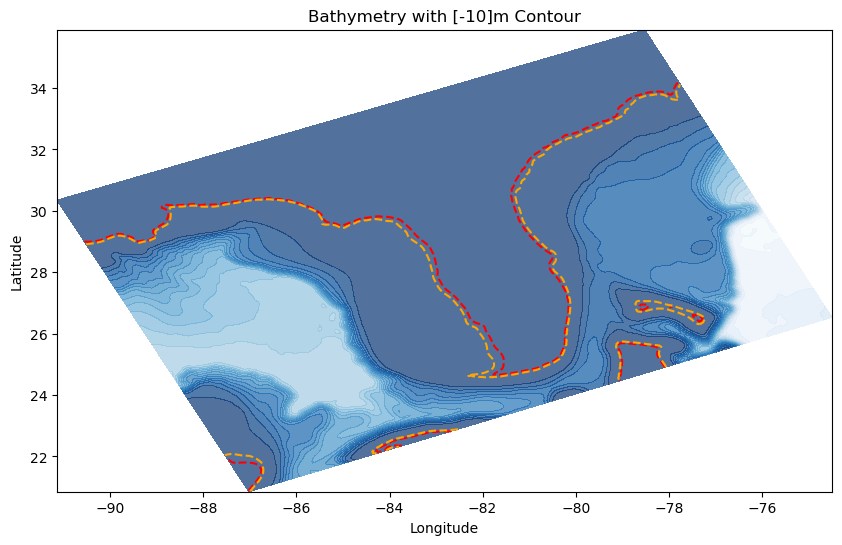

In [25]:
# Plot the depth and the contour
contour_level = [-10 ]
plt.figure(figsize=(10, 6))
plt.contourf(lon, lat, -h, levels=20, cmap='Blues', alpha=0.7)
contour = plt.contour(lon, lat, -h, levels=[-10], colors='red')
contour = plt.contour(lon, lat, -h, levels=[-15], colors='orange')
#plt.colorbar(label="Depth (m)")
plt.title(f"Bathymetry with {contour_level}m Contour")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

Path(array([[-86.99082733,  20.86579578],
       [-86.98447995,  20.89090842],
       [-86.98409341,  20.89170756],
       ...,
       [-77.37007381,  26.31251104],
       [-77.35786685,  26.30796714],
       [-77.3486442 ,  26.30453412]]), array([ 1,  2,  2, ...,  2,  2, 79], dtype=uint8))
Contour Points (Longitude, Latitude):
[[-86.99082733  20.86579578]
 [-86.98447995  20.89090842]
 [-86.98409341  20.89170756]
 ...
 [-77.37007381  26.31251104]
 [-77.35786685  26.30796714]
 [-77.3486442   26.30453412]]


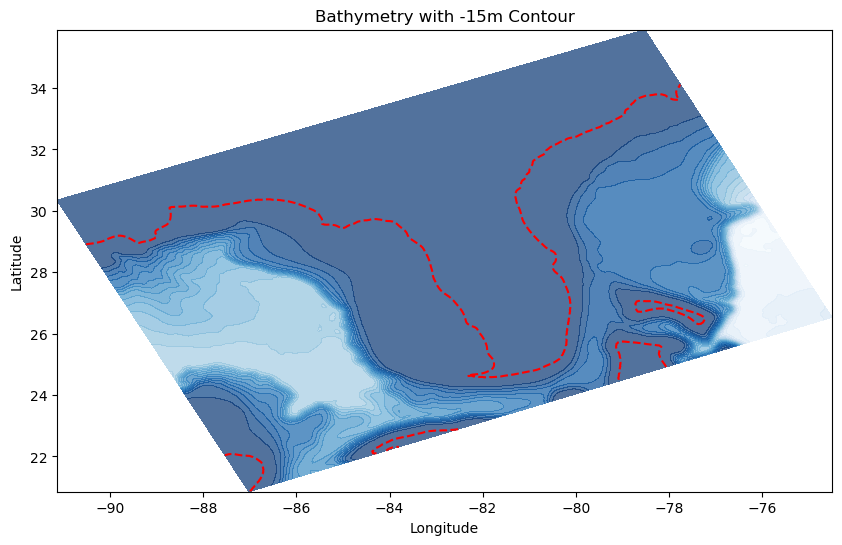

In [ ]:
for path in contour.get_paths():
    print(path)


# Extract contour points from the paths directly
contour_paths = [path for path in contour.get_paths()]


# Print or use the contour points
print("Contour Points (Longitude, Latitude):")
print(contour_points)

In [11]:
np.shape(contour_points)

(2686, 2)